# How the NBA Became Global

This project explores how the NBA has evolved from a largely domestic league into a truly global one.

Using a self-collected dataset of over 5,000 NBA players, I analyze how the share of Non-USA players entering the league has changed since 1990. Instead of counting active players each season, this analysis focuses strictly on **entry cohorts** — counting players only in the year they first entered the NBA.

The goal is to tell a clear data story:  
When did globalization accelerate, and how significant was the shift?

## Initialization (Run this first)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [8]:
players = pd.read_csv("../data/raw/players_bios.csv", on_bad_lines="skip")

players = players.dropna(subset=["debut_year"]).copy()
players["debut_year"] = players["debut_year"].astype(int)

players["is_usa"] = players["country"].str.contains(
    r"United States|USA|U\.S\.",
    case=False,
    na=False
)

players["origin"] = players["is_usa"].map({True: "USA", False: "Non-USA"})

In [3]:
players = pd.read_csv("../data/raw/players_bios.csv", on_bad_lines="skip")
players.shape

(5287, 5)

In [4]:
players = players.dropna(subset=["debut_year"]).copy()
players["debut_year"] = players["debut_year"].astype(int)

players["is_usa"] = players["country"].str.contains(r"United States|USA|U\.S\.", case=False, na=False)
players["origin"] = players["is_usa"].map({True: "USA", False: "Non-USA"})

players[["player_name","debut_year","country","origin"]].head()

,player_name,debut_year,country,origin
0,Alaa Abdelnaby,1990,Egypt eg,Non-USA
1,Zaid Abdul-Aziz,1968,United States,USA
2,Kareem Abdul-Jabbar,1969,United States,USA
3,Mahmoud Abdul-Rauf,1990,United States,USA
4,Tariq Abdul-Wahad,1997,France fr,Non-USA


In [5]:
debut_counts = (
    players
    .groupby(["debut_year", "origin"])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

debut_counts = debut_counts.loc[1990:2025].copy()

for col in ["USA", "Non-USA"]:
    if col not in debut_counts.columns:
        debut_counts[col] = 0

debut_counts.head()
print("columns:", debut_counts.columns.tolist())
print("shape:", debut_counts.shape)
debut_counts.loc[[1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025]].head(10)

columns: ['Non-USA', 'USA']
shape: (36, 2)


origin,Non-USA,USA
debut_year,,
1990,4,67
1995,6,58
2000,14,46
2005,17,64
2010,13,54
2015,18,55
2020,15,67
2025,28,69


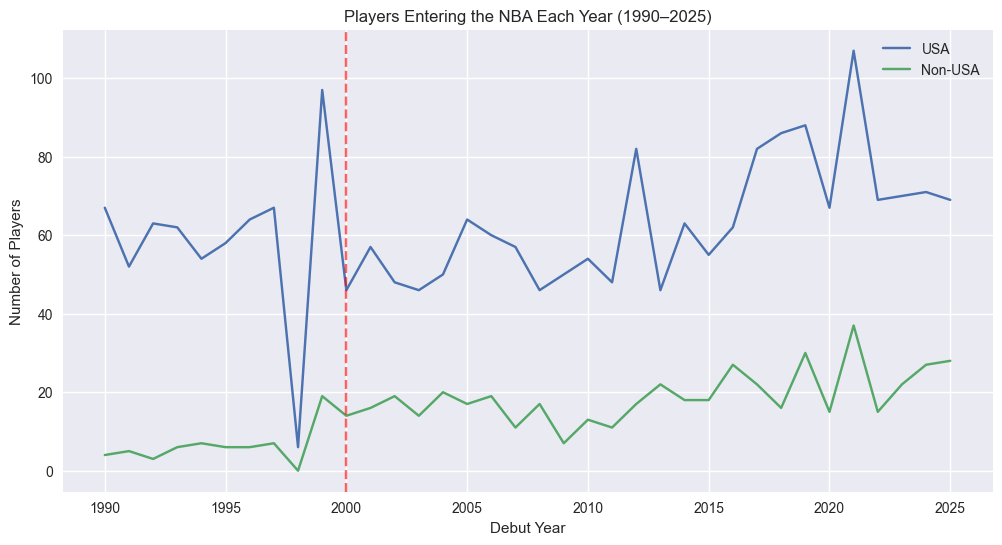

In [6]:
plt.figure(figsize=(12,6))

plt.plot(debut_counts.index, debut_counts["USA"], label="USA")
plt.plot(debut_counts.index, debut_counts["Non-USA"], label="Non-USA")

plt.axvline(2000, color="red", linestyle="--", alpha=0.6)
plt.title("Players Entering the NBA Each Year (1990–2025)")
plt.xlabel("Debut Year")
plt.ylabel("Number of Players")
plt.legend()
plt.show()

The line chart shows the number of players entering the NBA each year, grouped by USA and Non-USA origin.
During the 1990s, the league was overwhelmingly dominated by American players, with relatively few international entrants.

Starting in the early 2000s, the number of Non-USA players entering the NBA begins to rise steadily.
This upward trend accelerates throughout the 2010s and continues into the 2020s, reflecting the NBA’s expanding
global talent pipeline.

While the number of USA players entering the league remains relatively stable over time, the growth in Non-USA
players indicates that much of the league’s recent expansion has been driven by international talent rather than
domestic increases alone.

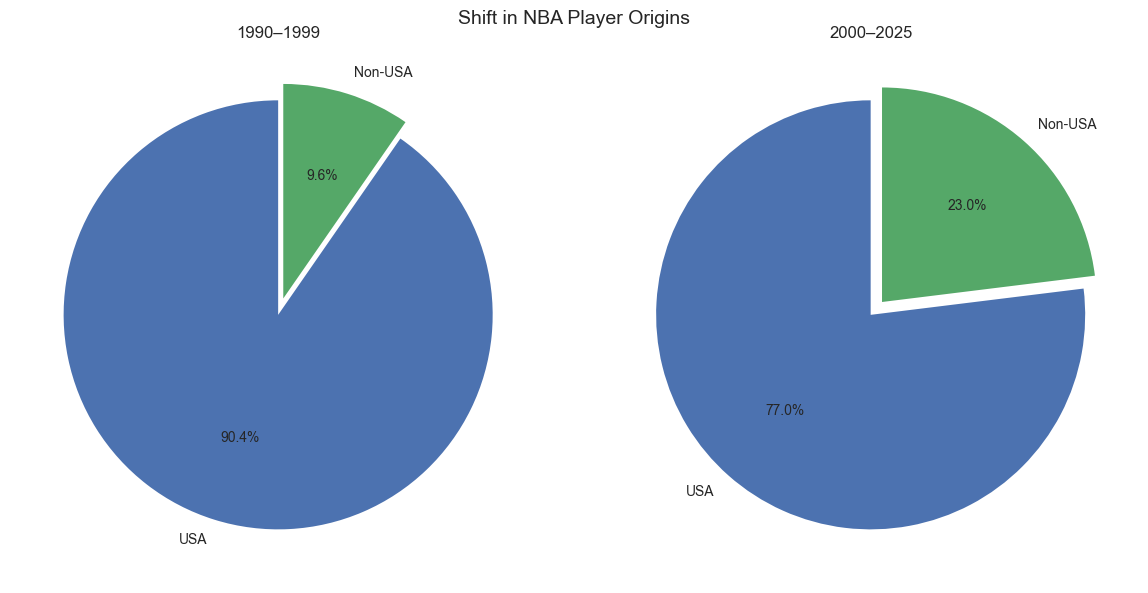

In [7]:
players_90s = players[(players["debut_year"] >= 1990) & (players["debut_year"] <= 1999)]
players_2000s = players[(players["debut_year"] >= 2000) & (players["debut_year"] <= 2025)]

pie_90s = players_90s["origin"].value_counts()
pie_2000s = players_2000s["origin"].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12,6))

# explode only Non-USA slice
explode_90s = [0.08 if label == "Non-USA" else 0 for label in pie_90s.index]
explode_2000s = [0.08 if label == "Non-USA" else 0 for label in pie_2000s.index]

axes[0].pie(
    pie_90s,
    labels=pie_90s.index,
    autopct="%1.1f%%",
    startangle=90,
    explode=explode_90s
)
axes[0].set_title("1990–1999")

axes[1].pie(
    pie_2000s,
    labels=pie_2000s.index,
    autopct="%1.1f%%",
    startangle=90,
    explode=explode_2000s
)
axes[1].set_title("2000–2025")

fig.suptitle("Shift in NBA Player Origins", fontsize=14)
plt.tight_layout()
plt.show()

The comparison reveals a clear structural shift in NBA player origins.
During the 1990s, only about 10% of players entering the league were Non-USA.
Since 2000, that figure has risen to approximately 23%, indicating that nearly
one in four new NBA players now comes from outside the United States.

## Key Insights

- The late-1990s dip reflects historical data limitations and the 1999 NBA lockout, rather
  than a true decline in NBA talent.
- Since 2000, the number and share of Non-USA players entering the NBA have increased
  steadily, signaling a structural shift in how the league sources new talent.
- While the NBA continues to develop strong domestic talent, its long-term growth has
  increasingly relied on international player pipelines.